## Examen Aprendizaje Profundo

#### Alumno: Lucas Rivela
#### Cohorte: 5
#### Profesores: Ezequiel Esposito y Marcos Maillot

In [307]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import torch
from scipy import stats
from sklearn import metrics
from torch.utils.data import Dataset, DataLoader

#### Punto 1

Para el modelo propuesto lo que voy a hacer es tener una loss function que exprese el error cuadrático medio (MSE) y luego voy a calcular la derivada de esta salida respecto de cada parámetro de la ecuación, utilizando la regla de la cadena

##### Modelo

$\hat{y} = x^3w_{1} + x^2w_{2} + xw_{1} + b$

##### Loss function

$L = (y_{i} - \hat{y_{i}})^2$

$\frac{\partial L}{\partial \hat{y}} = -2 . (y - \hat{y})$

##### Derivada respecto de $w_{1}$

$\frac{\partial L}{\partial {w_{1}}} = \frac{\partial L}{\partial \hat{y}} . \frac{\partial \hat{y}}{\partial w_{1}} = -2 . (y - \hat{y}) . (x^3 + x) $

##### Derivada respecto de $w_{2}$

$\frac{\partial L}{\partial {w_{2}}} = \frac{\partial L}{\partial \hat{y}} . \frac{\partial \hat{y}}{\partial w_{2}} = -2 . (y - \hat{y}) . (x^2) $

##### Derivada respecto de $b$

$\frac{\partial L}{\partial b} = \frac{\partial L}{\partial \hat{y}} . \frac{\partial \hat{y}}{\partial b} = -2 . (y - \hat{y}) $

In [56]:
# Hiperparametros
n_epochs = 1000
alfa = 0.001
batches = 10
epsilon = 0.1

In [57]:
# Inicializo pesos de forma aleatoria
w1 = random.uniform(0, 1)
w2 = random.uniform(0, 1)
b = random.uniform(0, 1)
print(w1, w2, b)

0.514398494861493 0.9668374007716195 0.43577147061524024


In [8]:
# Cargo el dataset
dataset = np.genfromtxt('dataset_1.csv', delimiter=',')
print("Shape ", dataset.shape)
print("NaNs ", np.isnan(np.sum(dataset)))

Shape  (10000, 2)
NaNs  False


In [9]:
def calculate_y_hat(X, w1, w2, b):
    """
    Función que hace el forward del modelo

    Parameters:
        X: Input batch del modelo para predecir el resultado
        w1: Peso para w1
        w2: Peso para w2
        b: Peso para b
    Returns:
        y_hat: (np.array) Predicciones del batch
    """
    y_hat = w1*(X**3) + w2*(X**2) + w1*(X) + [b] * len(X)
    return y_hat

In [10]:
def calculate_loss_w1(err, X_batch):
    """
    Función que calcula la derivada de la loss function respecto del peso w1

    Parameters:
        err: Error del batch
        X_batch: Input batch del modelo

    Returns:
        loss_w1: Derivada de la loss function respecto de w1 para el batch
    """
    loss = -2 * err * ( (X_batch**3) + (X_batch) )
    return np.sum(loss) / len(X_batch)

In [11]:
def calculate_loss_w2(err, X_batch):
    """
    Función que calcula la derivada de la loss function respecto del peso w2

    Parameters:
        err: Error del batch
        X_batch: Input batch del modelo

    Returns:
        loss_w2: Derivada de la loss function respecto de w2 para el batch
    """
    loss = -2 * err * (X_batch**2)
    return np.sum(loss) / len(X_batch)

In [12]:
def calculate_loss_b(err, X_batch):
    """
    Función que calcula la derivada de la loss function respecto del peso b

    Parameters:
        err: Error del batch
        X_batch: Input batch del modelo

    Returns:
        loss_b: Derivada de la loss function respecto de b para el batch
    """
    loss = -2 * err
    return np.sum(loss) / len(X_batch)

In [30]:
def create_mini_batches(dataset, batch_size):
    """
    Función que genera batches a partir de un dataset y un tamaño de batch

    Parameters:
        dataset: Dataset
        batch_size: tamaño del batch

    Returns:
        mini_batches: Lista de batches
    """
    mini_batches = []
    for i in range(0, dataset.shape[0], batch_size):
        mini_batch = np.array(dataset[i: i + batch_size,])
        mini_batches.append(mini_batch)
    
    return mini_batches

In [58]:
#batch_list = create_mini_batches(dataset[:8000,], batches)
batch_list = create_mini_batches(dataset, batches)
print("Training", len(batch_list))
#validation_batch = create_mini_batches(dataset[8001:,], batches)
#print("Validation", len(validation_batch))

Training 1000


In [59]:
ecm = []
val_ecm = []
for e in range(n_epochs):
    change_w1 = 0
    change_w2 = 0
    change_b = 0
    mse_batch = 0
    mse_val = 0

    for batch in batch_list:
        y_hat = calculate_y_hat(batch[:,0], w1, w2, b)
        err = (batch[:,1] - y_hat)

        loss_w1 = calculate_loss_w1(err, batch[:,0])
        loss_w2 = calculate_loss_w2(err, batch[:,0])
        loss_b = calculate_loss_b(err, batch[:,0])

        new_change_w1 = ( alfa * loss_w1 + epsilon * change_w1 )
        new_change_w2 = ( alfa * loss_w2 + epsilon * change_w2 )
        new_change_b = ( alfa * loss_b + epsilon * change_b )

        w1 = w1 - new_change_w1
        w2 = w2 - new_change_w2
        b = b - new_change_b

        change_w1 = new_change_w1
        change_w2 = new_change_w2
        change_b = new_change_b

        mse_batch += np.sum(err ** 2) / batch.shape[0]
    ecm.append(mse_batch)

    #for batch in validation_batch:
    #    y_hat = calculate_y_hat(batch[:,0], w1, w2, b)
    #    err = (batch[:,1] - y_hat)
    #    mse_val += np.sum(err ** 2) / batch.shape[0]
    #val_ecm.append(mse_val)

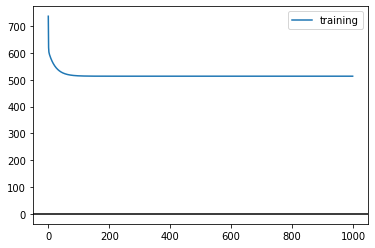

In [61]:
plt.plot(range(n_epochs), ecm, label='training')
plt.axhline(y=0, color='k')
plt.legend()

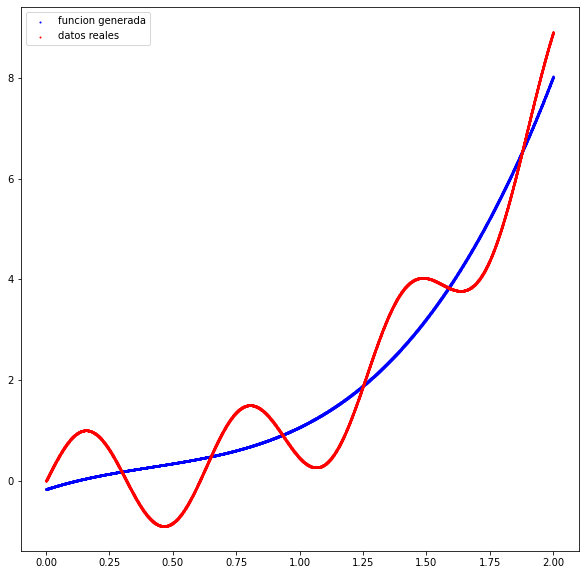

In [306]:
y_hat = calculate_y_hat(dataset[:,0], w1, w2, b)
plt.figure(figsize=(10,10))
plt.scatter(dataset[:,0], y_hat, label='funcion generada', c='blue', s=1)
plt.scatter(dataset[:,0], dataset[:,1], label='datos reales', c='red', s=1)
plt.legend()

De los gráficos anteriores se puede ver que el modelo está haciendo underfitting. Esto es así porque el MSE queda estancado y no logra seguir descendiendo. Además cuando vemos el scatterplot del $y$ real vs el $\hat{y}$; la función no tiene la flexibilidad necesaria para adaptarse a la curva.

#### Punto 2

In [81]:
class MyDataset(Dataset):

    def __init__(self, X, y):
      super().__init__()
      self.X = X
      self.y = y

    def __len__(self):
      return self.X.shape[0]

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

In [264]:
train = MyDataset(np.expand_dims(dataset[:,0], axis=0).T, np.expand_dims(dataset[:,1], axis=0).T)
#validation = MyDataset(np.expand_dims(dataset[8000:,0], axis=0).T, np.expand_dims(dataset[8000:,1], axis=0).T)

In [265]:
print("Train", len(train))
#print("Validation", len(validation))

Train 10000


In [266]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=False)
#valid_dataloader = DataLoader(validation, batch_size=64, shuffle=False)

In [267]:
class NNet(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=1, out_features=20, bias=True)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_3 = torch.nn.ReLU()
        self.linear_4 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_4 = torch.nn.ReLU()
        self.linear_5 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_5 = torch.nn.ReLU()
        self.linear_6 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_6 = torch.nn.ReLU()
        self.linear_7 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_7 = torch.nn.ReLU()
        self.linear_8 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_8 = torch.nn.ReLU()
        self.linear_9 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_9 = torch.nn.ReLU()
        self.linear_10 = torch.nn.Linear(in_features=20, out_features=20, bias=True)
        self.relu_10 = torch.nn.ReLU()
        self.output = torch.nn.Linear(in_features=20, out_features=1, bias=True)

    def forward(self, x): # x.shape -> 64x1
        x = self.linear_1(x) # 64x200
        x = self.relu_1(x) # 64x200
        x = self.linear_2(x) # 64x100
        x = self.relu_2(x) # 64x100
        x = self.linear_3(x) # 64x50
        x = self.relu_3(x) # 64x50
        x = self.linear_4(x) # 64x50
        x = self.relu_4(x) # 64x50
        x = self.linear_5(x) # 64x50
        x = self.relu_5(x) # 64x50
        x = self.linear_6(x) # 64x50
        x = self.relu_6(x) # 64x50
        x = self.linear_7(x) # 64x50
        x = self.relu_7(x) # 64x50
        x = self.linear_8(x) # 64x50
        x = self.relu_8(x) # 64x50
        x = self.linear_9(x) # 64x50
        x = self.relu_9(x) # 64x50
        x = self.linear_10(x) # 64x50
        x = self.relu_10(x) # 64x50
        x = self.output(x) # 64x1
        return x

In [302]:
nnet = NNet()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001)
loss_function = torch.nn.MSELoss()

In [119]:
device = ""
if torch.cuda.is_available():
  device = "cuda:0"
else:
  device = "cpu"

In [120]:
RANGE=100

In [303]:
nnet.to(device)

loss_list = []
validation_loss_list = []
for epoch in range(RANGE):
    running_loss = 0
    running_y_score = []
    running_validation_loss = 0
    running_validation_y_score = []
    y_label = []
    
    #### TRAINING ####
    for i, data in enumerate(train_dataloader):
        X_batch, y_batch = data #  Datos del batch
        X_batch = X_batch.to(device).float()
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet(X_batch)

        # backprop
        loss = loss_function(y_batch_score, Y_batch)  # Calcula el loss
        loss.backward()  # Hacer los gradientes del loss

        # actualizacion de parametros
        optimizer.step()

        # metrics
        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())

    # Metrics
    loss_list.append(running_loss)
    print(f"Epoch {epoch} | Training loss: {running_loss}")

    ###### VALIDATION ####
    #nnet.eval()
    #with torch.no_grad():
    #    for i, data in enumerate(valid_dataloader): 
    #        # Datos del batch
    #        X_validation_batch, y_validation_batch = data
    #        X_validation_batch = X_validation_batch.to(device).float()
    #        Y_validation_batch = y_validation_batch.to(device).float()
    #
    #        # Forward
    #        y_validation_batch_score = nnet(X_validation_batch)
    #
    #        validation_loss = loss_function(y_validation_batch_score, Y_validation_batch) #  Calcula el loss
    #
    #        # Acumular validation loss
    #        running_validation_loss += validation_loss.item()
    #
    #        # Acumular metrics y_score and y
    #        running_validation_y_score += list(y_validation_batch_score.detach().cpu().numpy())
    #
    ## Calcular las metricas
    #validation_loss_list.append(running_validation_loss)
    #print(f"Epoch {epoch} | Validation loss: {running_validation_loss}")

Epoch 0 | Training loss: 826.8471979498863
Epoch 1 | Training loss: 91.55461031198502
Epoch 2 | Training loss: 80.23423650860786
Epoch 3 | Training loss: 76.78788569569588
Epoch 4 | Training loss: 65.82765436172485
Epoch 5 | Training loss: 46.76093591749668
Epoch 6 | Training loss: 43.37208506464958
Epoch 7 | Training loss: 41.97687063366175
Epoch 8 | Training loss: 39.94534566998482
Epoch 9 | Training loss: 38.06306739151478
Epoch 10 | Training loss: 35.92683035880327
Epoch 11 | Training loss: 30.0580199547112
Epoch 12 | Training loss: 11.64140777476132
Epoch 13 | Training loss: 0.9802045291289687
Epoch 14 | Training loss: 0.16737772143096663
Epoch 15 | Training loss: 0.10269188793608919
Epoch 16 | Training loss: 0.08321504821651615
Epoch 17 | Training loss: 0.06910685170441866
Epoch 18 | Training loss: 0.0596879591466859
Epoch 19 | Training loss: 0.0524889978041756
Epoch 20 | Training loss: 0.05195330006245058
Epoch 21 | Training loss: 0.04968427868152503
Epoch 22 | Training loss: 0.

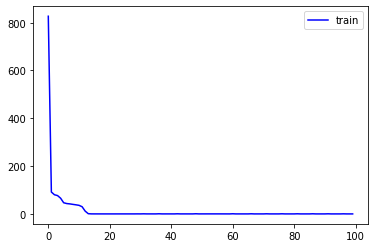

In [304]:
# Plot train loss and valid loss vs epochs
fig, ax1 = plt.subplots(1,1)
x = range(0, len(loss_list))
ax1.plot(x, loss_list, color='b', label='train')
#ax1.plot(x, validation_loss_list, color='r', label='valid')
ax1.legend()

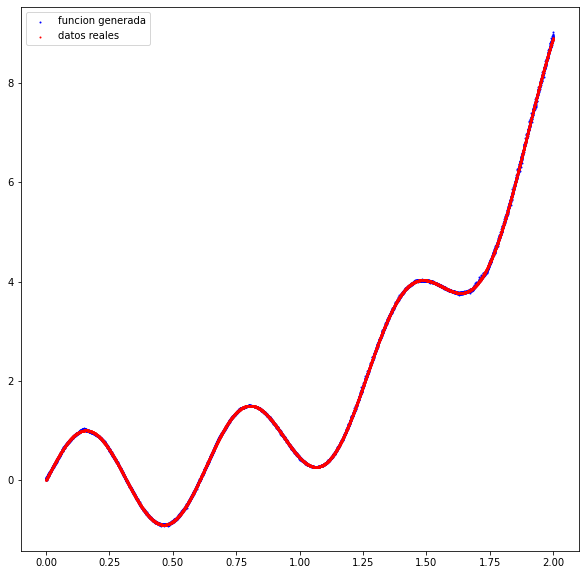

In [305]:
plt.figure(figsize=(10,10))
plt.scatter(dataset[:,0], running_y_score, label='funcion generada', c='blue', s=1)
plt.scatter(dataset[:,0], dataset[:,1], label='datos reales', c='red', s=1)
plt.legend()

De los gráficos anteriores podemos ver que la Red está haciendo overfitting, ya que se está aprendiendo de memoria la función dentro del intervalo 0,2.

Agrego Regularización L2

In [296]:
nnet = NNet()
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.001, weight_decay=25e-3)

In [297]:
nnet.to(device)

loss_list = []
validation_loss_list = []
for epoch in range(RANGE):
    running_loss = 0
    running_y_score = []
    running_validation_loss = 0
    running_validation_y_score = []
    y_label = []
    
    #### TRAINING ####
    for i, data in enumerate(train_dataloader):
        X_batch, y_batch = data #  Datos del batch
        X_batch = X_batch.to(device).float()
        Y_batch = y_batch.to(device).float()

        # forward
        optimizer.zero_grad()
        y_batch_score = nnet(X_batch)

        # backprop
        loss = loss_function(y_batch_score, Y_batch)  # Calcula el loss
        loss.backward()  # Hacer los gradientes del loss

        # actualizacion de parametros
        optimizer.step()

        # metrics
        running_loss += loss.item()
        running_y_score += list(y_batch_score.detach().cpu().numpy())

    # Metrics
    loss_list.append(running_loss)
    print(f"Epoch {epoch} | Training loss: {running_loss}")

Epoch 0 | Training loss: 935.2953335642815
Epoch 1 | Training loss: 85.27918720245361
Epoch 2 | Training loss: 81.75405350327492
Epoch 3 | Training loss: 81.61565592885017
Epoch 4 | Training loss: 81.58612886071205
Epoch 5 | Training loss: 81.56845504045486
Epoch 6 | Training loss: 81.55111089348793
Epoch 7 | Training loss: 81.54748266935349
Epoch 8 | Training loss: 81.53663411736488
Epoch 9 | Training loss: 81.52129945158958
Epoch 10 | Training loss: 81.52173271775246
Epoch 11 | Training loss: 81.47778964042664
Epoch 12 | Training loss: 81.45994195342064
Epoch 13 | Training loss: 81.44738608598709
Epoch 14 | Training loss: 81.42913526296616
Epoch 15 | Training loss: 81.4188024699688
Epoch 16 | Training loss: 81.3962234556675
Epoch 17 | Training loss: 81.38541132211685
Epoch 18 | Training loss: 81.37401133775711
Epoch 19 | Training loss: 81.36018109321594
Epoch 20 | Training loss: 81.35624796152115
Epoch 21 | Training loss: 81.34126818180084
Epoch 22 | Training loss: 81.32580387592316


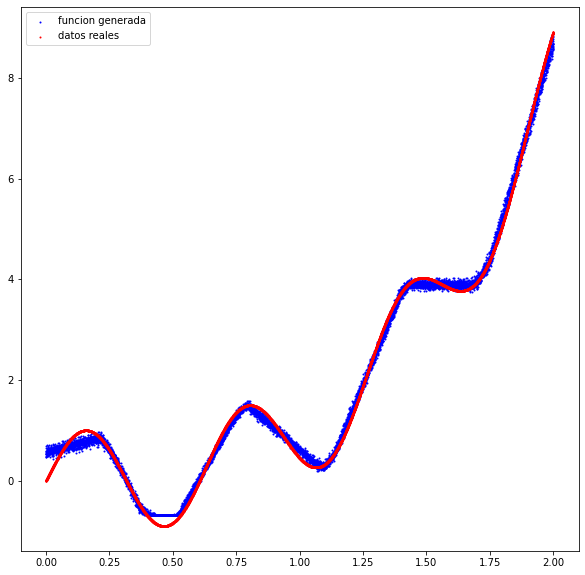

In [299]:
plt.figure(figsize=(10,10))
plt.scatter(dataset[:,0], running_y_score, label='funcion generada', c='blue', s=1)
plt.scatter(dataset[:,0], dataset[:,1], label='datos reales', c='red', s=1)
plt.legend()

#### Punto 3 - A

EDA

In [308]:
df = pd.read_csv('./dataset_2.csv')

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [311]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [314]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Aca vemos que hay 2 columnas con muchos nulls, Product_Category_3 tiene aprox. 70% y Product_Category_2 tiene aprox. 30%. Ambas columnas son candidatas a ser ignoradas para el modelo.